## AISINGERS 🐳 v.3.5.1 fix CoverGen | https://t.me/aisingers  

**Чтобы быть в курсе всех обновлений и изменений в этом блокноте, рекомендую подписаться на наш [Телеграм-канал](https://t.me/aisingers)**

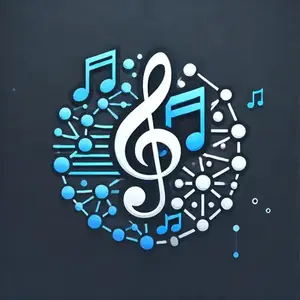

**<font color='#FF8C00'> _Ваша поддержка! <3_</font>**

<a href="https://www.donationalerts.com/r/varaslaw">
  <img src="https://www.donationalerts.com/img/brand/donationalerts.svg" width="200" alt="Donationalerts">
</a>

♫⋆｡♪ ₊˚♬ ﾟ.♫⋆｡♪ ₊˚♬ ﾟ.♫⋆｡♪ ₊˚♬ ﾟ.

In [ ]:
# @title 🐳 Клонирование репозитория
from IPython.display import clear_output
import os

# @markdown ---
# @markdown Наш ТГ: https://t.me/aisingers

# Клонирование репозитория
repo_url = "https://github.com/varaslaw/AISingersCoverGen"
repo_dir = "/content/AISingersCoverGen"

# Проверка, существует ли уже репозиторий
if not os.path.exists(repo_dir):
    print("Клонирование репозитория...")
    !git clone {repo_url}

# Удаление sample_data, если существует
!rm -rf /content/sample_data

# Переход в директорию репозитория
%cd {repo_dir}

# Проверка, что репозиторий клонирован и в нем есть файлы
if not os.listdir(repo_dir):
    print("Ошибка: Репозиторий пуст. Проверьте структуру репозитория.")
    raise SystemExit("Завершаем выполнение.")

print("Репозиторий успешно клонирован и зависимости установлены.")
clear_output()
print("Готово! Репозиторий AISingersCoverGen успешно клонирован и настроен.")


Готово! Репозиторий AISingersCoverGen успешно клонирован и настроен.


In [ ]:
#@title 🐳 Установка Библиотек
import codecs
import time
from IPython.display import clear_output

req = 'requirements.txt'
pt = 'src/configs'
#@markdown Выполнение этой ячейки может занять до 6 - 8 минут
!sudo apt-get update
!sudo apt-get install python3.10
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 1
!sudo update-alternatives --set python3 /usr/bin/python3.10
!curl https://bootstrap.pypa.io/get-pip.py -o get-pip.py
!python3.10 get-pip.py
!python3.10 -m pip install --upgrade pip==24.0
!pip install pip==23.1

print("Используется Pitch 12")
%cd /content/AISingersCoverGen/$pt
time.sleep(5)
!sed -i '/torch==/d' $req
!sed -i '/torchaudio==/d' $req
!sed -i '/numpy==/d' $req
!sed -i '/librosa==/d' $req
!sed -i '/Requests==/d' $req
!sed -i '/scipy==/d' $req
!sed -i '/soundfile==/d' $req
!sed -i '/tqdm==/d' $req

time.sleep(5)
!pip install -r requirements.txt
# Исправление устаревшего использования numpy
!sed -i 's/(np.int)/(int)/g' '../vc_infer_pipeline.py'
%cd ../../
!pip uninstall gradio
!pip install gradio==3.50.2
!pip install gdown mega.py requests beautifulsoup4

# Установка CUDA-фикса
!python -m pip install ort-nightly-gpu --index-url=https://aiinfra.pkgs.visualstudio.com/PublicPackages/_packaging/ort-cuda-12-nightly/pypi/simple/
print("Установка зависимостей завершена")

!sudo apt update
print("Обновление системы завершено")

!sudo apt install sox
clear_output()

models = 'src/download_models.py'
!python $models
clear_output()

print("Загрузка модели разделения голоса и модели Hubert Base завершена")
print("Выполнение этой ячейки завершено, переходите к следующей ячейке")

Загрузка модели разделения голоса и модели Hubert Base завершена
Выполнение этой ячейки завершено, переходите к следующей ячейке


In [ ]:
#@title Доп библиотеки
!pip uninstall -y mega.py
!pip install --upgrade asyncio
!pip install mega.py --no-deps
!pip install tenacity
!pip install requests
!pip install cryptography

Found existing installation: mega.py 1.0.8
Uninstalling mega.py-1.0.8:
  Successfully uninstalled mega.py-1.0.8
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 3.9 MB/s eta 0:00:00
  Using cached mega.py-1.0.8-py2.py3-none-any.whl (19 kB)


In [ ]:
#@title 🐳 Запуск WebUI ▶︎ •၊၊||၊|။|||| |
#@markdown ---
import time
from IPython.display import clear_output
import os

# Add these lines to explicitly uninstall and install gradio
print("Uninstalling existing gradio...")
!pip uninstall -y gradio
print("Installing gradio version 3.50.2...")
!pip install gradio==3.50.2
print("Gradio installation complete.")

runpice = 'src/webui-ru.py'
Url = "Gradio" #@param ['Gradio','Ngrok','Cloudflared']
#@markdown ---
#@markdown - Токен нужен только если вы используете Ngrok. Вы можете бесплатно создать аккаунт на [ngrok](https://dashboard.ngrok.com/signup).
#@markdown - Нажмите [эту ссылку](https://dashboard.ngrok.com/get-started/your-authtoken) чтобы получить ваш токен авторизации и вставьте его сюда:
Token = "" #@param {type:"string"}

def update_timer_and_print():
    global timer
    while True:
        hours, remainder = divmod(timer, 3600)
        minutes, seconds = divmod(remainder, 60)
        timer_str = f'{hours:02}:{minutes:02}:{seconds:02}'
        print(f'\rТаймер: {timer_str} ', end='', flush=True)
        time.sleep(1)
        timer += 1

timer = 0
import threading
threading.Thread(target=update_timer_and_print, daemon=True).start()

if Url == "Gradio":
    !python $runpice --share
elif Url == "Cloudflared":
    !curl -LO https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
    !dpkg -i cloudflared-linux-amd64.deb
    !rm -rf nohup.out
    !nohup cloudflared tunnel --url localhost:7860 &
    clear_output()
    time.sleep(5)
    !grep -oE "https://[a-zA-Z0-9.-]+\.trycloudflare\.com" nohup.out
    !python $runpice --listen-port 7860
else:
    !pip install pyngrok
    from pyngrok import ngrok
    ngrok.set_auth_token(Token)
    ngrok.kill()
    cover_tunnel = ngrok.connect(7860)
    print("URL CoverGen:", cover_tunnel.public_url)
    !python $runpice --listen-port 7860

print("Важно: Вы используете gradio версии 3.48.0, однако доступна версия 4.29.0. Рекомендуется обновление.")

Uninstalling existing gradio...
Таймер: 00:01:21 Found existing installation: gradio 3.50.2
Uninstalling gradio-3.50.2:
  Successfully uninstalled gradio-3.50.2
Installing gradio version 3.50.2...
Таймер: 00:01:22 Collecting gradio==3.50.2
  Using cached gradio-3.50.2-py3-none-any.whl (20.3 MB)
Таймер: 00:01:23 Requirement already satisfied: filelock in /usr/local/lib/python3.10/dist-packages (from huggingface-hub>=0.14.0->gradio==3.50.2) (3.18.0)
Таймер: 00:01:24 Installing collected packages: gradio
Таймер: 00:01:25 Successfully installed gradio-3.50.2
Gradio installation complete.
Таймер: 00:00:00 Traceback (most recent call last):
  File "/content/AISingersCoverGen/src/webui-ru.py", line 8, in <module>
    import gradio as gr
  File "/usr/local/lib/python3.10/dist-packages/gradio/__init__.py", line 3, in <module>
    import gradio.components as components
  File "/usr/local/lib/python3.10/dist-packages/gradio/components/__init__.py", line 1, in <module>
    from gradio.components.a

### 💡 Советы по использованию Google Colab


Если вычислительные мощности видеокарты T4 закончены:

Запустите этот блокнот на другом Google аккаунте.